# Comparison of the updated population density (2020) of the neighborhood councils of the LA city.

### The population of the neighborhood councils have been computed using the latest census 2020 data by 2 methods-
#### - 1) Geospatial analysis using arcGIS software 
#### - 2) Geospatial analysis using Geopandas

#### This notebook is going to compare the results from these two methods and find the percentage difference between the two. 

In [1]:
# Importing the necessary packages.
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt 

In [2]:
os.getcwd()
os.chdir('C:/Users/AdithiPriya/Desktop/Hack for LA/Geospatial analysis')

# Loading the files of interest
NC_pop_geopandas = pd.read_csv('census_final1.csv',index_col= 0)
NC_pop_arcGIS = pd.read_csv('NC_pop_2020_arcGIS.csv')

In [3]:
# Since we have to merge the above files on the column- neighborhood council (NC) name, (the arcGIS file does not have NC_ID)
# let us make sure the same naming convention is followed. Usually I prefer to merge by NC_ID- easiest thing to do. 

# Rename the columns in NC_pop_arcGIS.

NC_pop_arcGIS.rename(columns= {'council_name': 'NAME','sum_pop20': 'pop_arcGIS', 'area_sqmi': 'area_arcGIS(sq_miles)', 'pop_density': 'pop_den_arcGIS'}, inplace=True) 
NC_pop_arcGIS['pop_arcGIS']= NC_pop_arcGIS['pop_arcGIS'].astype(float)

# Cleaning the NC_pop_geopandas and NC_pop_arcGIS.
NC_pop_arcGIS['NAME'] = NC_pop_arcGIS['NAME'].apply(str.upper)
NC_pop_geopandas['NAME'] = NC_pop_geopandas['NAME'].str.replace(' NC', '')
NC_pop_geopandas['NAME'] = NC_pop_geopandas['NAME'].str.replace('NC ', '')
NC_pop_geopandas['NAME'] = NC_pop_geopandas['NAME'].str.replace(' NDC', '')
NC_pop_geopandas['NAME'] = NC_pop_geopandas['NAME'].str.replace(' CC', '')
NC_pop_geopandas['NAME'] = NC_pop_geopandas['NAME'].str.replace('COMMUNITY AND NEIGHBORS FOR NINTH DISTRICT UNITY', 'CANNDU')
NC_pop_geopandas['NAME'] = NC_pop_geopandas['NAME'].str.replace('WEST LOS ANGELES SAWTELLE', 'WEST LOS ANGELES')
NC_pop_geopandas['NAME'] = NC_pop_geopandas['NAME'].str.replace('UNITED NEIGHBORHOODS', 'UNNC')
NC_pop_geopandas['NAME'] = NC_pop_geopandas['NAME'].str.replace('COMMUNITY AND NEIGHBORS FOR NINTH DISTRICT UNITY', 'CANNDU')
NC_pop_arcGIS['NAME'] = NC_pop_arcGIS['NAME'].str.replace('CANNDU', 'CANNDU (CANNDU)')
NC_pop_geopandas['NAME'] = NC_pop_geopandas['NAME'].str.replace('EMPOWERMENT CONGRESS CENTRAL AREA', 'EMPOWERMENT CONGRESS CENTRAL')
NC_pop_geopandas['NAME'] = NC_pop_geopandas['NAME'].str.replace('EMPOWERMENT CONGRESS NORTH AREA', 'EMPOWERMENT CONGRESS NORTH')
NC_pop_geopandas['NAME'] = NC_pop_geopandas['NAME'].str.replace('EMPOWERMENT CONGRESS SOUTHEAST AREA', 'EMPOWERMENT CONGRESS SOUTHEAST')
NC_pop_geopandas['NAME'] = NC_pop_geopandas['NAME'].str.replace('EMPOWERMENT CONGRESS SOUTHWEST AREA', 'EMPOWERMENT CONGRESS SOUTHWEST')
NC_pop_geopandas['NAME'] = NC_pop_geopandas['NAME'].str.replace('EMPOWERMENT CONGRESS WEST AREA', 'EMPOWERMENT CONGRESS WEST')
NC_pop_geopandas['NAME'] = NC_pop_geopandas['NAME'].str.replace('NORTH HOLLYWOOD NORTH EAST', 'NORTH HOLLYWOOD NORTHEAST')
NC_pop_geopandas['NAME'] = NC_pop_geopandas['NAME'].str.replace('ZAPATA-KING', 'ZAPATA KING')
NC_pop_geopandas['NAME'] = NC_pop_geopandas['NAME'].str.replace('UNITED NEIGHBORHOODS', 'UNNC')
NC_pop_geopandas.sort_values(by='NAME', inplace= True, ignore_index=True)

In [4]:
NC_pop_arcGIS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   NAME                   99 non-null     object 
 1   pop_arcGIS             99 non-null     float64
 2   area_arcGIS(sq_miles)  99 non-null     float64
 3   pop_den_arcGIS         99 non-null     float64
dtypes: float64(3), object(1)
memory usage: 3.2+ KB


In [5]:
NC_pop_geopandas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   NAME              99 non-null     object 
 1   NC_ID             99 non-null     int64  
 2   total_population  99 non-null     float64
 3   area(sq_miles)    99 non-null     float64
 4   pop_density       99 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 4.0+ KB


In [6]:
# Merge the two dataframes on the column- 'NAME'.
pop_compare = pd.merge(NC_pop_geopandas, NC_pop_arcGIS, on= 'NAME')
pop_compare.head()

,NAME,NC_ID,total_population,area(sq_miles),pop_density,pop_arcGIS,area_arcGIS(sq_miles),pop_den_arcGIS
0,ARLETA,6,37550.428577,3.284868,11431.335753,33954.0,3.276005,10364.452920
1,ARROYO SECO,42,20635.891874,3.063327,6736.432010,18922.0,3.069553,6164.414787
2,ARTS DISTRICT LITTLE TOKYO,46,5696.208864,0.879216,6478.740126,8933.0,0.882223,10125.559200
3,ATWATER VILLAGE,37,29735.923325,8.748450,3398.993417,13988.0,8.773863,1594.280640
4,BEL AIR-BEVERLY CREST,64,40598.581678,17.038756,2382.719852,26194.0,16.984129,1542.263356


In [7]:
# Adding the population difference column.
pop_compare['pop_diff(%)'] = (abs(pop_compare['total_population']-pop_compare['pop_arcGIS'])/((pop_compare['total_population']+pop_compare['pop_arcGIS'])/2))*100
pop_diff = pop_compare[['NAME', 'NC_ID', 'total_population', 'pop_arcGIS', 'pop_diff(%)']]

In [8]:
pop_diff.iloc[pop_diff['pop_diff(%)'].argmax()]

NAME                HARBOR GATEWAY SOUTH
NC_ID                                 91
total_population            66148.609608
pop_arcGIS                       23067.0
pop_diff(%)                    96.578636
Name: 35, dtype: object

In [9]:
# Number of rows with population difference greater than 10%
pop_diff[pop_diff['pop_diff(%)'] <= 10].nunique()

NAME                48
NC_ID               48
total_population    48
pop_arcGIS          48
pop_diff(%)         48
dtype: int64

In [10]:
# Number of NCs with pop_diff lesser than or equal to 10%.
pop_diff[pop_diff['pop_diff(%)'] > 10].nunique()

NAME                51
NC_ID               51
total_population    51
pop_arcGIS          51
pop_diff(%)         51
dtype: int64

In [11]:
pop_diff_a = pop_diff[pop_diff['pop_diff(%)'] <= 10]

In [12]:
pop_diff_b = pop_diff[pop_diff['pop_diff(%)'] > 10]

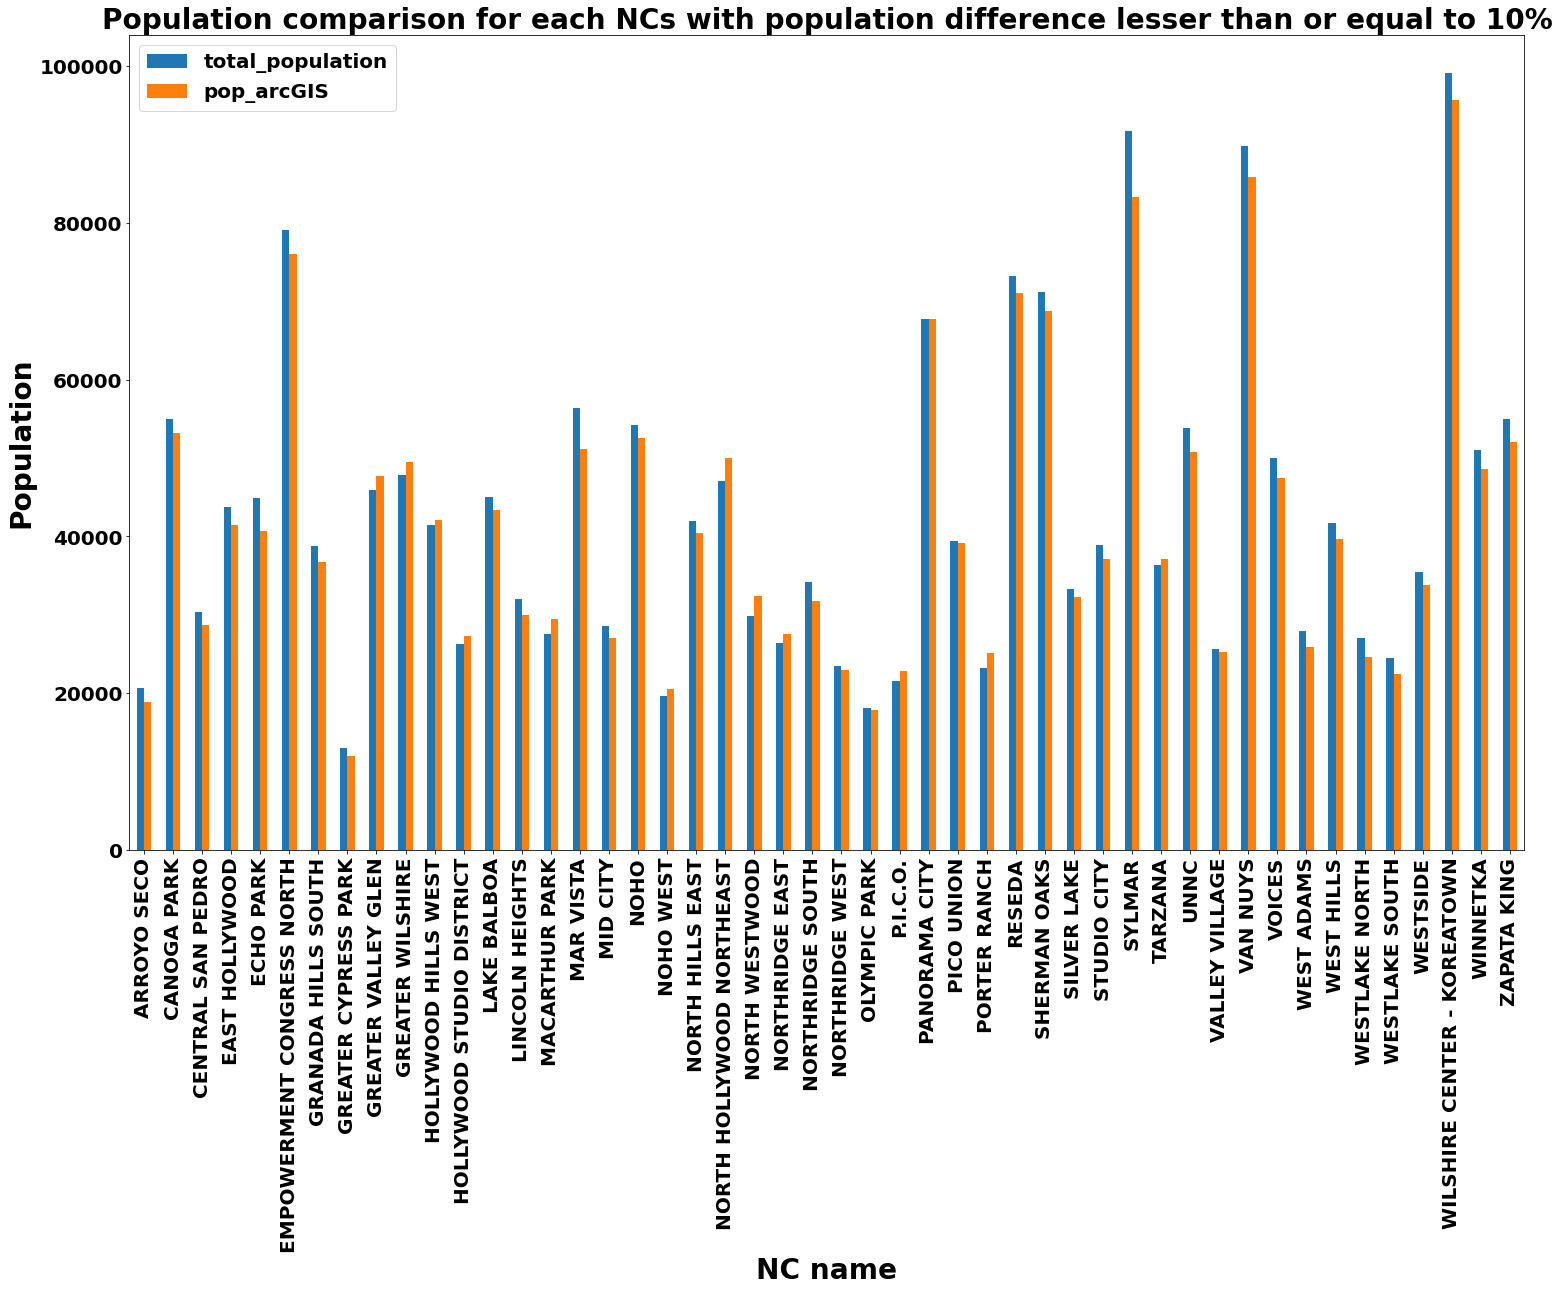

In [13]:
# Population difference lesser than or equal to 10%
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["font.weight"] = "bold"
fig, ax= plt.subplots(figsize=(25,15))
# gca stands for get current axis
ax =plt.gca()
pop_diff_a.plot(kind='bar', x= 'NAME', y=['total_population', 'pop_arcGIS'], ax=ax)
plt.title('Population comparison for each NCs with population difference lesser than or equal to 10%',size=28, fontweight='bold')
plt.xlabel('NC name',size=28)
plt.ylabel('Population', size=28)
ax.tick_params(axis='both', labelsize=20)
ax.legend(loc="upper left", fontsize=20)
plt.show()

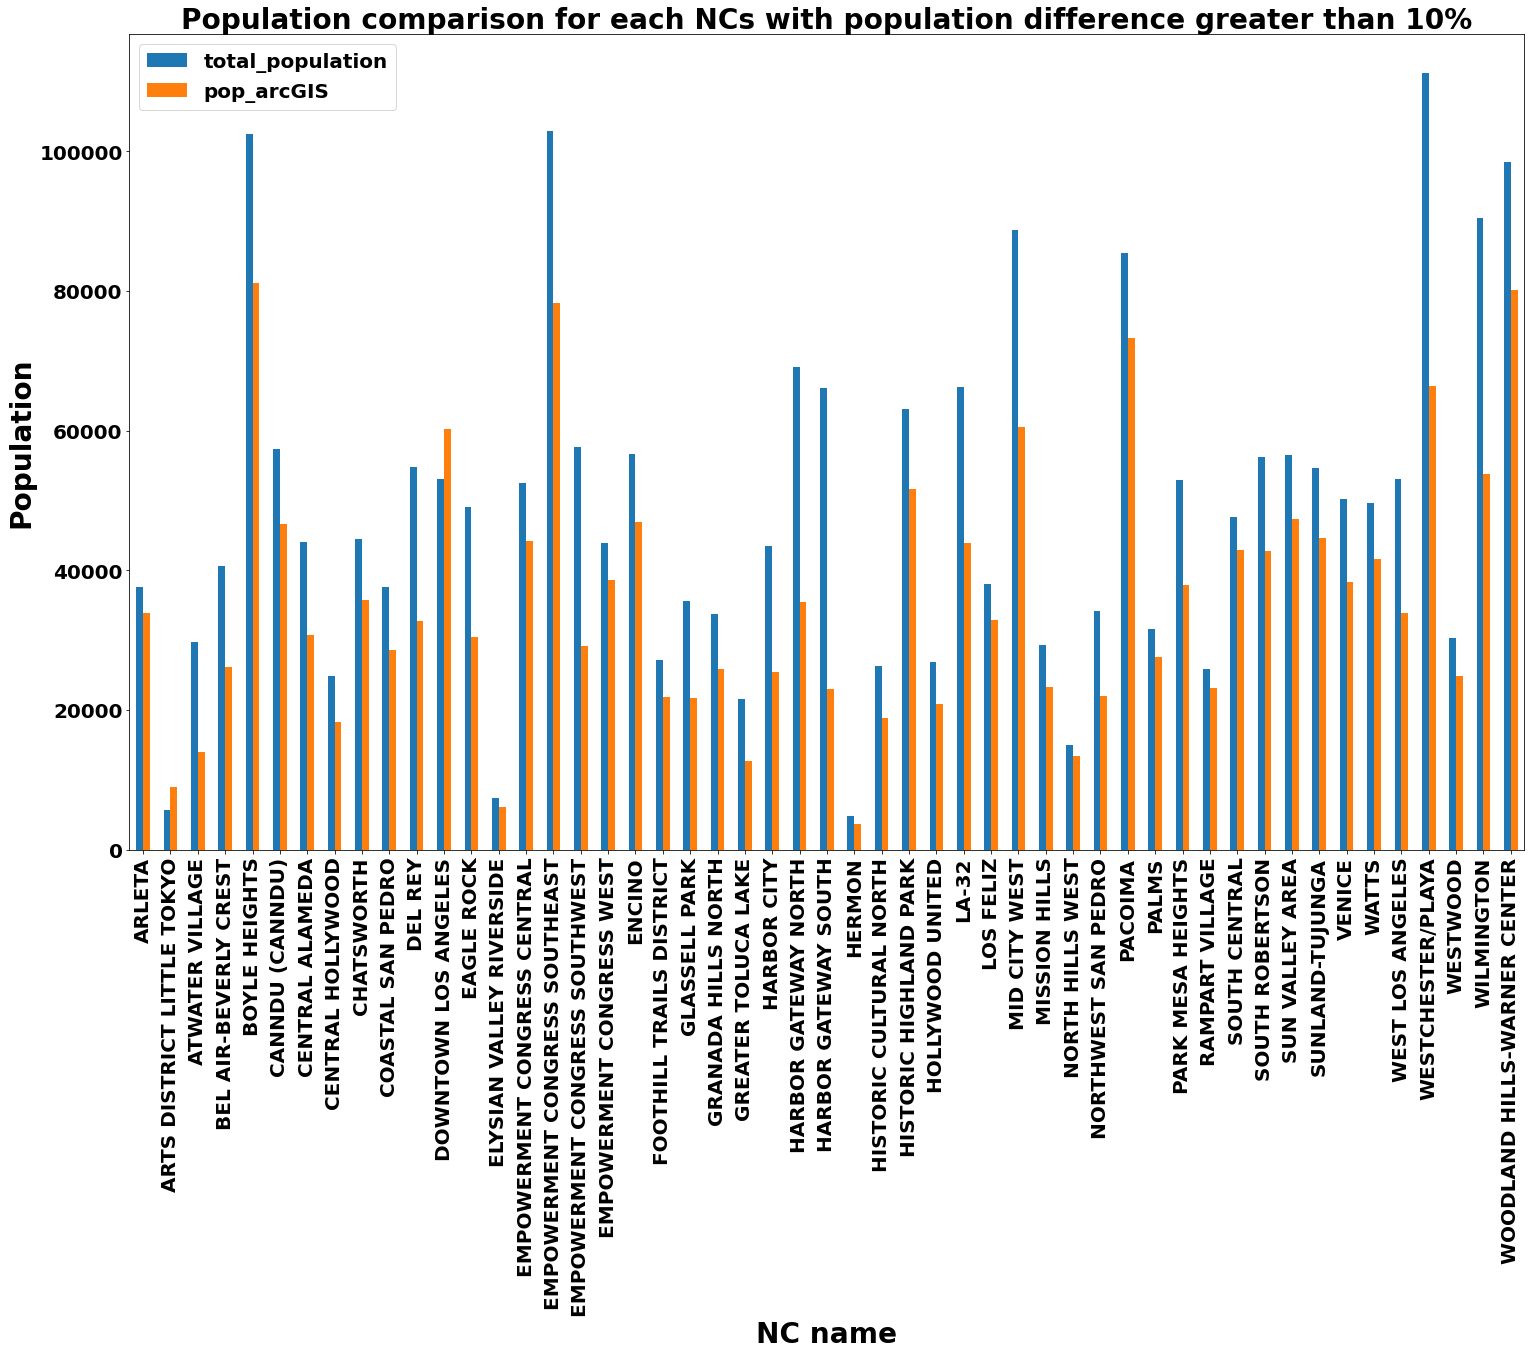

In [14]:
# Population difference greater than to 10%
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["font.weight"] = "bold"
fig, ax= plt.subplots(figsize=(25,15))
ax =plt.gca()
pop_diff_b.plot(kind='bar', x= 'NAME', y=['total_population', 'pop_arcGIS'], ax=ax)
plt.title('Population comparison for each NCs with population difference greater than 10%',size=28, fontweight='bold')
plt.xlabel('NC name',size=28)
plt.ylabel('Population', size=28)
ax.tick_params(axis='both', labelsize=20)
ax.legend(loc="upper left", fontsize=20)
plt.show()

In [15]:
# Comparing the area.
pop_compare['area_diff(%)'] = (abs(pop_compare['area(sq_miles)']-pop_compare['area_arcGIS(sq_miles)'])/((pop_compare['area(sq_miles)']+pop_compare['area_arcGIS(sq_miles)'])/2))*100
area_diff = pop_compare[['NAME', 'NC_ID', 'area(sq_miles)', 'area_arcGIS(sq_miles)', 'area_diff(%)']]

In [16]:
area_diff[area_diff['area_diff(%)'] <= 0.5].nunique()

NAME                     79
NC_ID                    79
area(sq_miles)           79
area_arcGIS(sq_miles)    79
area_diff(%)             79
dtype: int64

In [17]:
area_diff[area_diff['area_diff(%)'] > 0.5].nunique()

NAME                     20
NC_ID                    20
area(sq_miles)           20
area_arcGIS(sq_miles)    20
area_diff(%)             20
dtype: int64

In [18]:
# Adding the population density difference column.
pop_compare['pop_density_diff(%)'] = (abs(pop_compare['pop_density']-pop_compare['pop_den_arcGIS'])/((pop_compare['pop_density']+pop_compare['pop_den_arcGIS'])/2))*100
pop_density_diff = pop_compare[['NAME', 'NC_ID', 'pop_density', 'pop_den_arcGIS', 'pop_density_diff(%)']]

In [19]:
pop_density_diff_a = pop_density_diff[pop_density_diff['pop_density_diff(%)'] <= 10]
pop_density_diff_b = pop_density_diff[pop_density_diff['pop_density_diff(%)'] > 10]

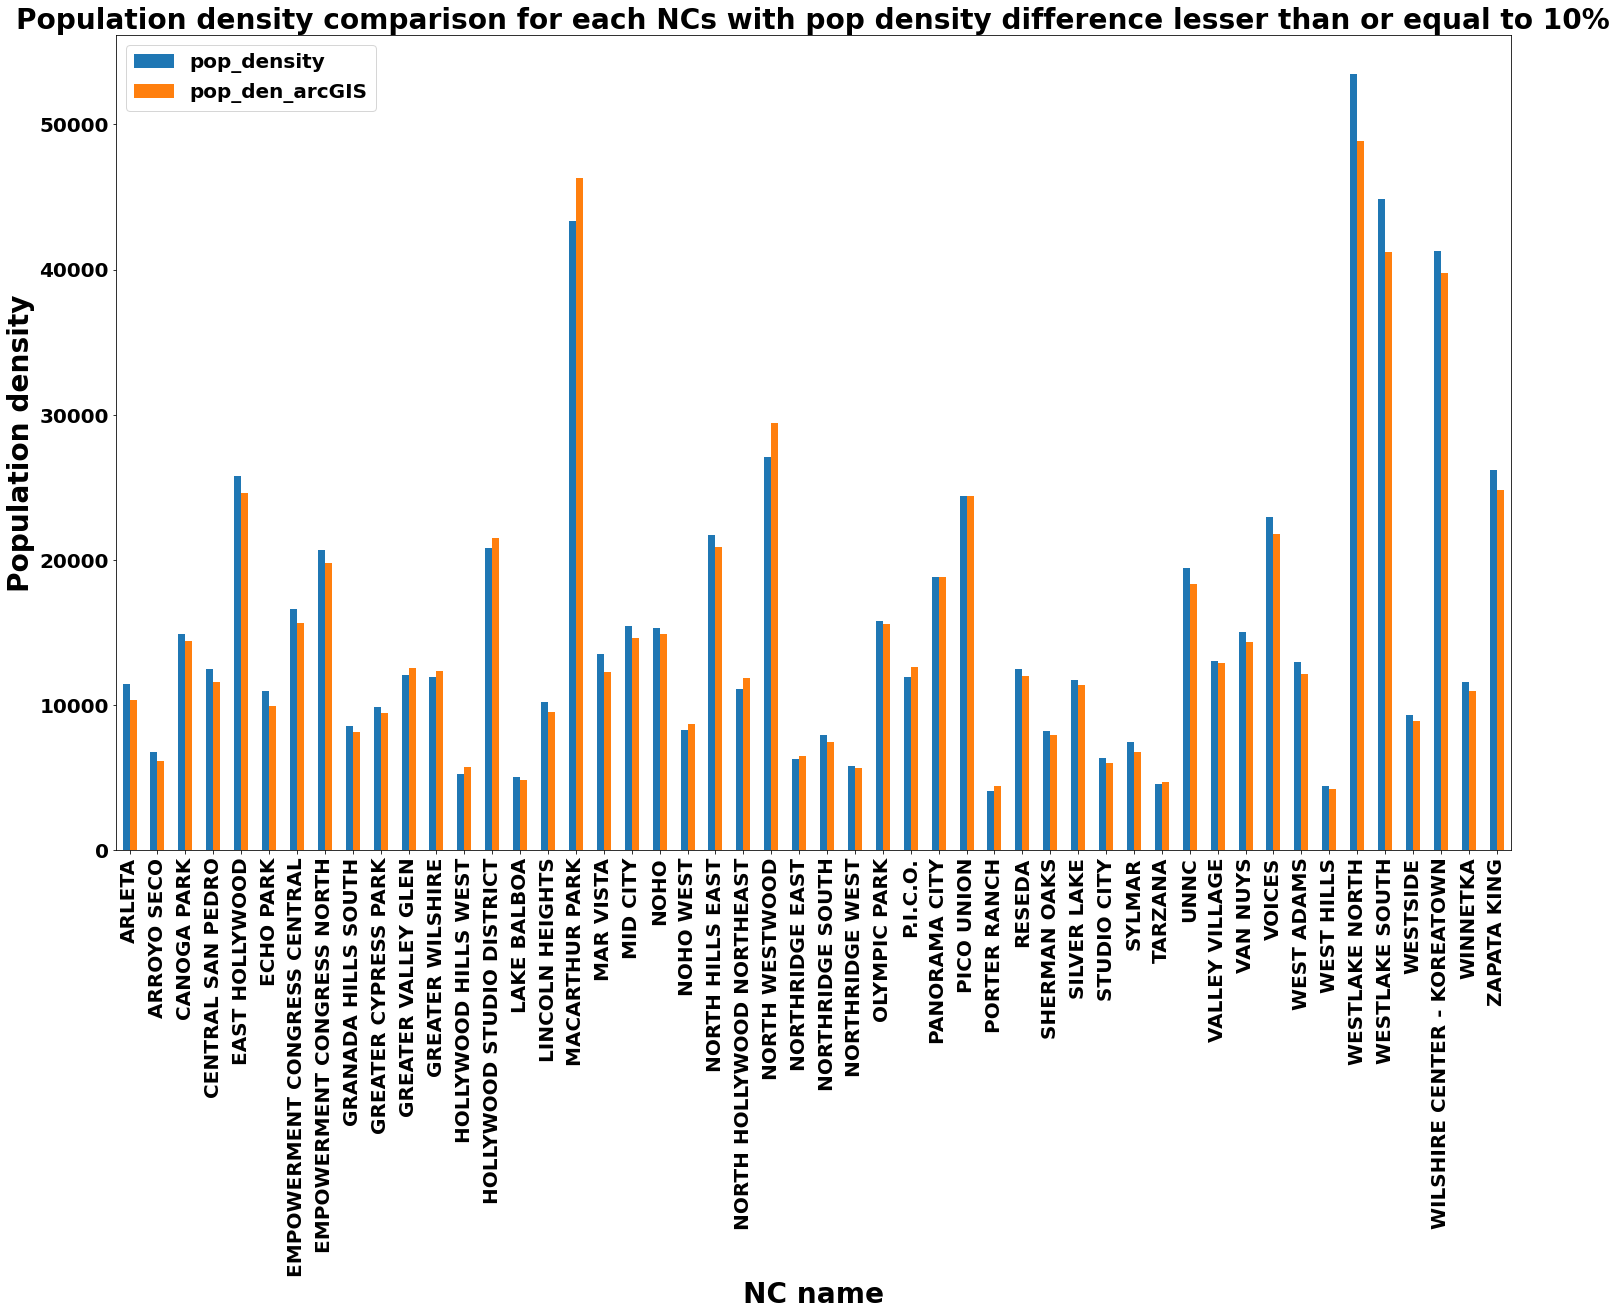

In [20]:
# Population density difference lesser than or equal to 10%
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["font.weight"] = "bold"
fig, ax= plt.subplots(figsize=(25,15))
# gca stands for get current axis
ax =plt.gca()
pop_density_diff_a.plot(kind='bar', x= 'NAME', y=['pop_density', 'pop_den_arcGIS'], ax=ax)
plt.title('Population density comparison for each NCs with pop density difference lesser than or equal to 10%',size=28, fontweight='bold')
plt.xlabel('NC name',size=28)
plt.ylabel('Population density', size=28)
ax.tick_params(axis='both', labelsize=20)
ax.legend(loc="upper left", fontsize=20)
plt.show()

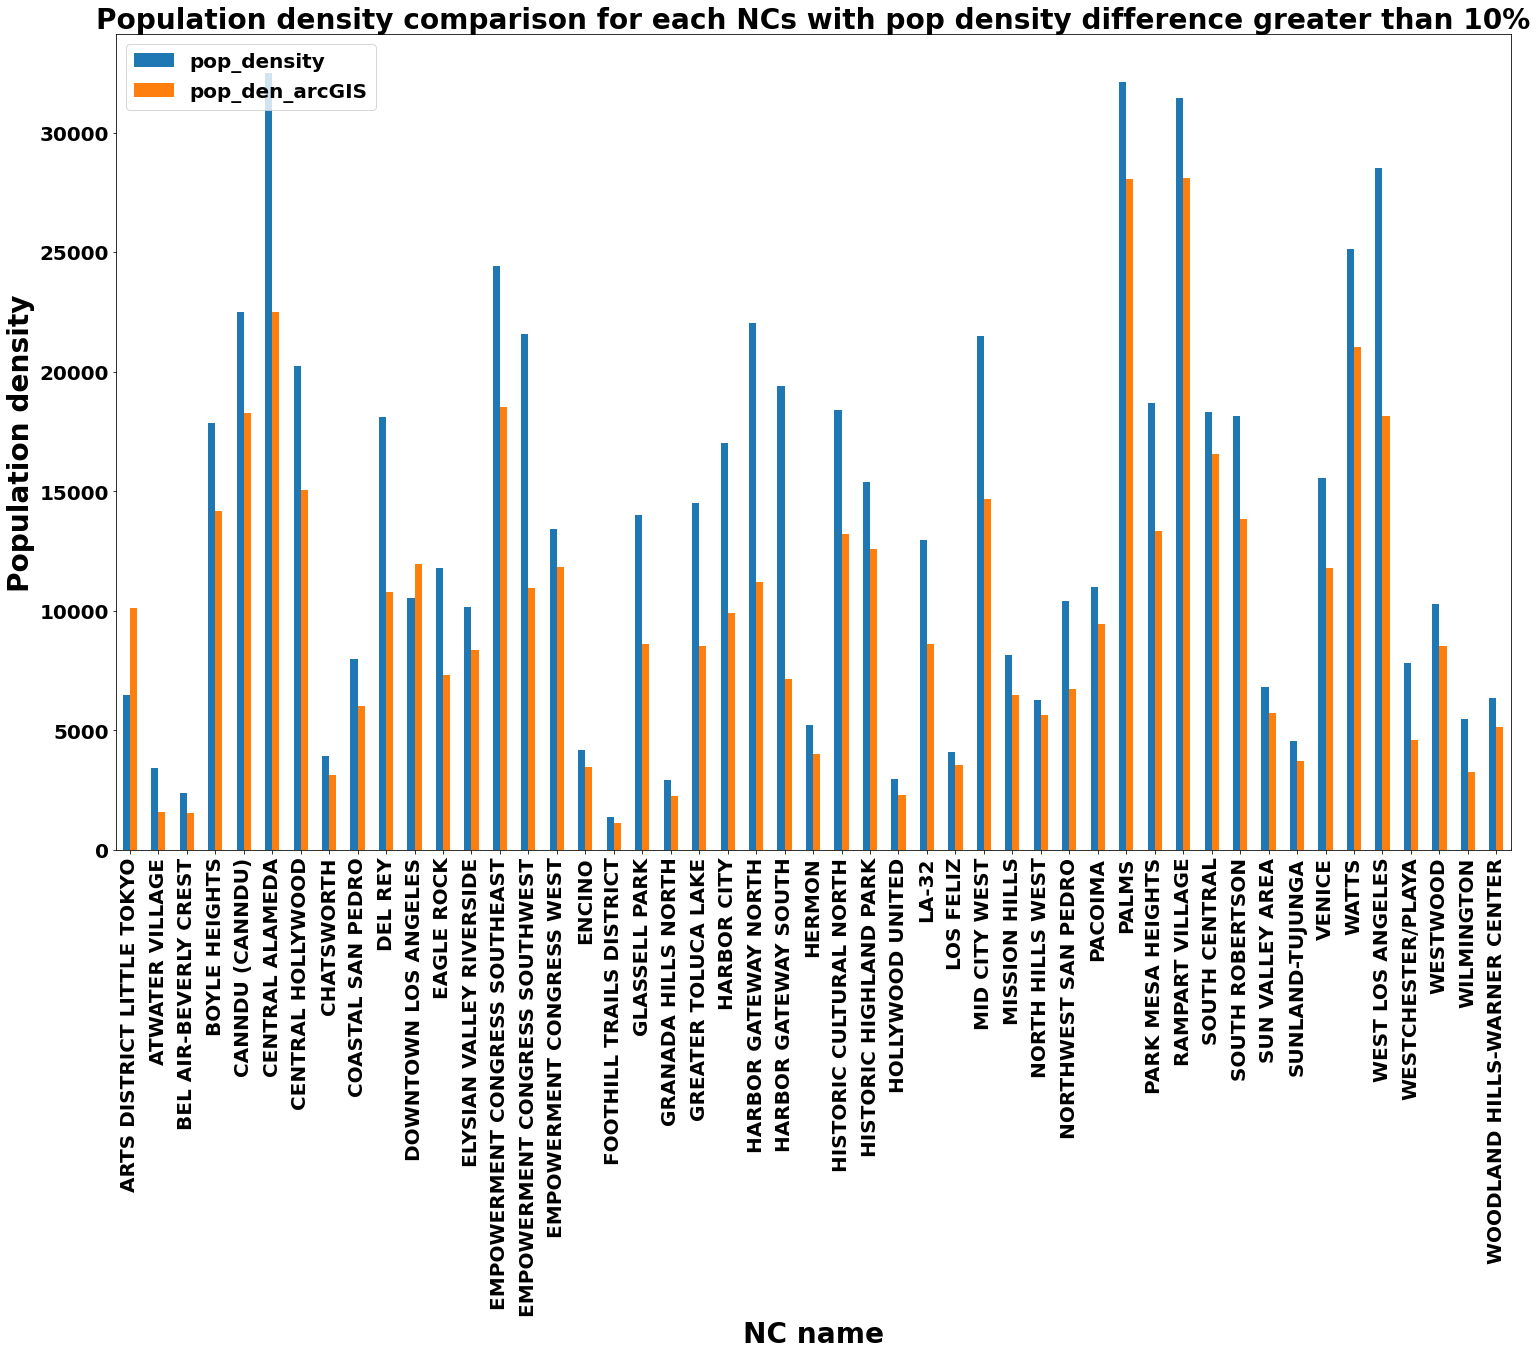

In [21]:
# Population density difference greater than 10%
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["font.weight"] = "bold"
fig, ax= plt.subplots(figsize=(25,15))
ax =plt.gca()
pop_density_diff_b.plot(kind='bar', x= 'NAME', y=['pop_density', 'pop_den_arcGIS'], ax=ax)
plt.title('Population density comparison for each NCs with pop density difference greater than 10%',size=28, fontweight='bold')
plt.xlabel('NC name',size=28)
plt.ylabel('Population density', size=28)
ax.tick_params(axis='both', labelsize=20)
ax.legend(loc="upper left", fontsize=20)
plt.show()

In [22]:
pop_compare.to_csv('pop_compare.csv')

In [23]:
pop_total = pop_compare.total_population.sum()
pop_total_arcGIS = pop_compare.pop_arcGIS.sum()

In [24]:
pop_total 

4534711.999999999

In [25]:
pop_total_arcGIS

3814700.0